In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv('data/fire_eye_avg.csv')
#df.reset_index(drop=True, inplace=True)
df.drop(columns='index', inplace=True)
X = df.drop(columns=['fire_mask_next_day'])
y = df['fire_mask_next_day']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


accuracy_train = model.score(X_train_scaled, y_train)
accuracy = model.score(X_test_scaled, y_test)
print(f'Training Accuracy: {accuracy_train}', f'Accuracy: {accuracy}')


Training Accuracy: 0.857736013986014 Accuracy: 0.8436681222707424


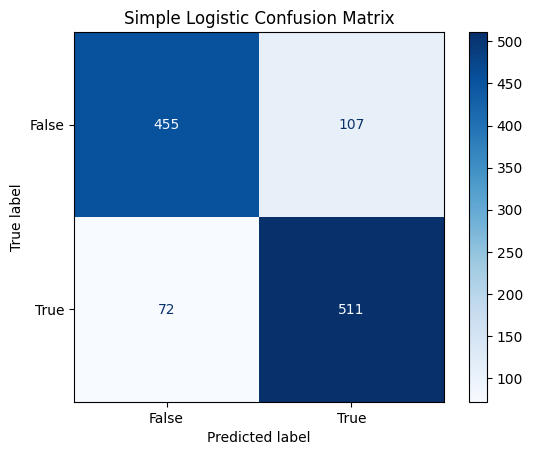

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Simple Logistic Confusion Matrix')
plt.show()



In [65]:
import statsmodels.api as sm


X_const = sm.add_constant(X_train.drop(columns=['burn_index', 'vegetation', 'fire_mask_1_1']).astype(float))
# Fitting the logistic regression model
model = sm.Logit(y_train, X_const)
result = model.fit()

print(result.model.exog_names)

print(result.summary())

print()


Optimization terminated successfully.
         Current function value: 0.312650
         Iterations 13
['const', 'elevation', 'wind_direction', 'wind_speed', 'energy_release_component', 'precipitation', 'tempature_min', 'tempature_max', 'drought_index', 'population_density', 'fire_mask_0_0', 'fire_mask_0_1', 'fire_mask_0_2', 'fire_mask_1_0', 'fire_mask_1_2', 'fire_mask_2_0', 'fire_mask_2_1', 'fire_mask_2_2']
                           Logit Regression Results                           
Dep. Variable:     fire_mask_next_day   No. Observations:                 4576
Model:                          Logit   Df Residuals:                     4558
Method:                           MLE   Df Model:                           17
Date:                Mon, 24 Jun 2024   Pseudo R-squ.:                  0.5484
Time:                        21:00:09   Log-Likelihood:                -1430.7
converged:                       True   LL-Null:                       -3168.1
Covariance Type:            nonrobu

c:\Development\University of Colorado Boulder\CSCA 5622\FireEye\venv\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Development\University of Colorado Boulder\CSCA 5622\FireEye\venv\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Training Accuracy: 0.8548951048951049 Accuracy: 0.8419213973799127


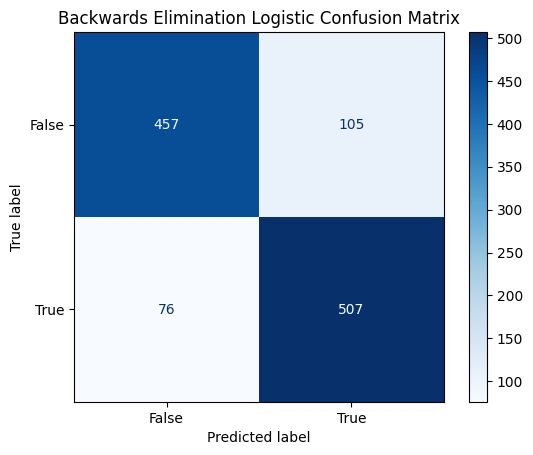

In [67]:
X = df.drop(columns=['fire_mask_next_day', 'fire_mask_1_1', 'burn_index', 'vegetation'])
y = df['fire_mask_next_day']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


accuracy_train = model.score(X_train_scaled, y_train)
accuracy = model.score(X_test_scaled, y_test)
print(f'Training Accuracy: {accuracy_train}', f'Accuracy: {accuracy}')


conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Backwards Elimination Logistic Confusion Matrix')
plt.show()